<a href="https://colab.research.google.com/github/financieras/pyCourse/blob/main/jupyter/calisto3/0250_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estrategias de Trading
Mostrar información de mercado de Microsoft Corporation usando las librerías:
* **Librería TA-Lib**: Technical Analysis Library
* Yahoo finance

In [ ]:
!pip install talib-binary   # para cargar la librería TA-Lib en el entorno de Colab

In [ ]:
!pip install yfinance       # para cargar la librería de Yahoo finance en el entorno de Colab
                            # si da error, ejecutar una segunda vez

In [ ]:
import talib as ta                # importamos la librería con el alias ta
import numpy as np
import matplotlib.pyplot as plt   # importamos pyplot de la librería matplotlib con el alias plt
import yfinance as yf             # importamos la librería de Yahoo finance con el alias yf

msft = yf.Ticker("MSFT")

# Obtener información de mercado de un ticker concreto
msft.info         # información sobre Microsoft Corporation

# Obtener de datos históricos
Como ejemplo utilizaremos la compañía Microsoft Corporation.

In [ ]:
# get historical market data
hist = msft.history(period="max")
print(hist)

# Mostrar las últimas noticias
Noticias de Microsoft Corporation.

In [ ]:
# show news
msft.news

# Mostrar los resultados
Resultados de Microsoft Corporation
* anuales
* trimestrales

In [ ]:
# mostrar los resultados
msft.earnings

,Revenue,Earnings
Year,,
2018,110360000000,16571000000
2019,125843000000,39240000000
2020,143015000000,44281000000
2021,168088000000,61271000000


In [ ]:
# mostrar los resultados trimestrales
msft.quarterly_earnings

,Revenue,Earnings
Quarter,,
2Q2021,46152000000,16458000000
3Q2021,45317000000,20505000000
4Q2021,51728000000,18765000000
1Q2022,49360000000,16728000000


# Gráficos: Bayesian Methods for Hackers
Usar uno de los estilos de gráficos de la librería matplotlib que es:  
[Bayesian Methods for Hackers style sheet](https://matplotlib.org/stable/gallery/style_sheets/bmh.html?highlight=bmh)


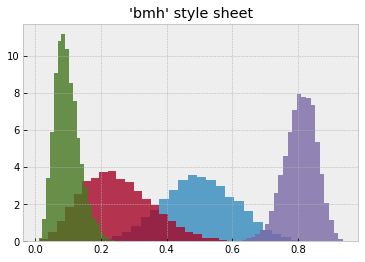

In [ ]:
np.random.seed()      # barajamos la serie de aleatorios

plt.style.use('bmh')  # establecemos este estilo de gráficos

def plot_beta_hist(ax, a, b):
    ax.hist(np.random.beta(a, b, size=10000),
            histtype="stepfilled", bins=25, alpha=0.8, density=True)


fig, ax = plt.subplots()
plot_beta_hist(ax, 10, 10)
plot_beta_hist(ax, 4, 12)
plot_beta_hist(ax, 50, 12)
plot_beta_hist(ax, 6, 55)
ax.set_title("'bmh' style sheet")

plt.show()

# Obtener datos de cotización para un cierto periodo dado
Datos de Apple.

In [ ]:
# Ticker de Apple AAPL

aapl = yf.download('AAPL', start='2019-1-1', end='2022-6-30' )
print(aapl)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02   38.722500   39.712502   38.557499   39.480000   38.221371   
2019-01-03   35.994999   36.430000   35.500000   35.547501   34.414242   
2019-01-04   36.132500   37.137501   35.950001   37.064999   35.883358   
2019-01-07   37.174999   37.207500   36.474998   36.982498   35.803482   
2019-01-08   37.389999   37.955002   37.130001   37.687500   36.486015   
...                ...         ...         ...         ...         ...   
2022-06-06  147.029999  148.570007  144.899994  146.139999  146.139999   
2022-06-07  144.350006  149.000000  144.100006  148.710007  148.710007   
2022-06-08  148.580002  149.869995  147.460007  147.960007  147.960007   
2022-06-09  147.080002  147.949997  142.529999  142.639999  142.639999   
2022-06-10  140.279999  140.759995  137.059

# Media móvil
Obtener la media movil de Apple.
* SMA → media móvil estandar
* EMA → media móvil exponencial

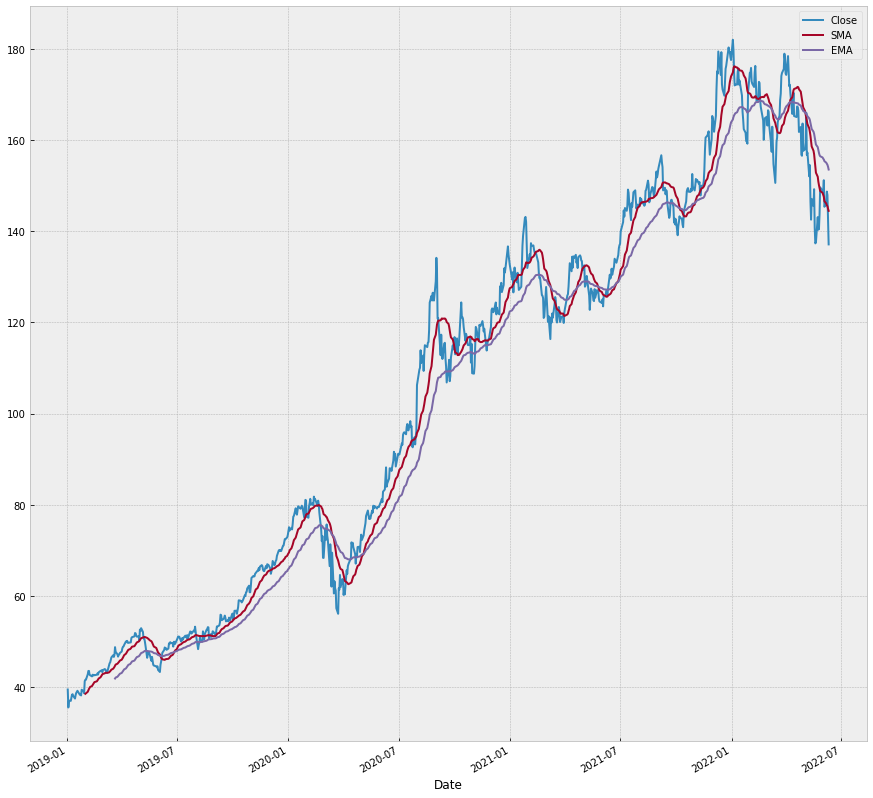

In [ ]:
# la media movil estandar es SMA, a usaremos de 21 periodos
aapl['SMA'] = ta.SMA(aapl.Close.values, 21)  # también se puede poner ta.SMA(aapl['Close'])

# la media movil exponencial se llama EMA, la pondremos de 55 periodos
aapl['EMA'] = ta.EMA(aapl.Close.values, 55)

# plot
aapl[['Close', 'SMA', 'EMA']].plot(figsize=(15, 15))
plt.show()

# Bandas de Bollinger
[Bollinger Band](https://www.investopedia.com/terms/b/bollingerbands.asp)

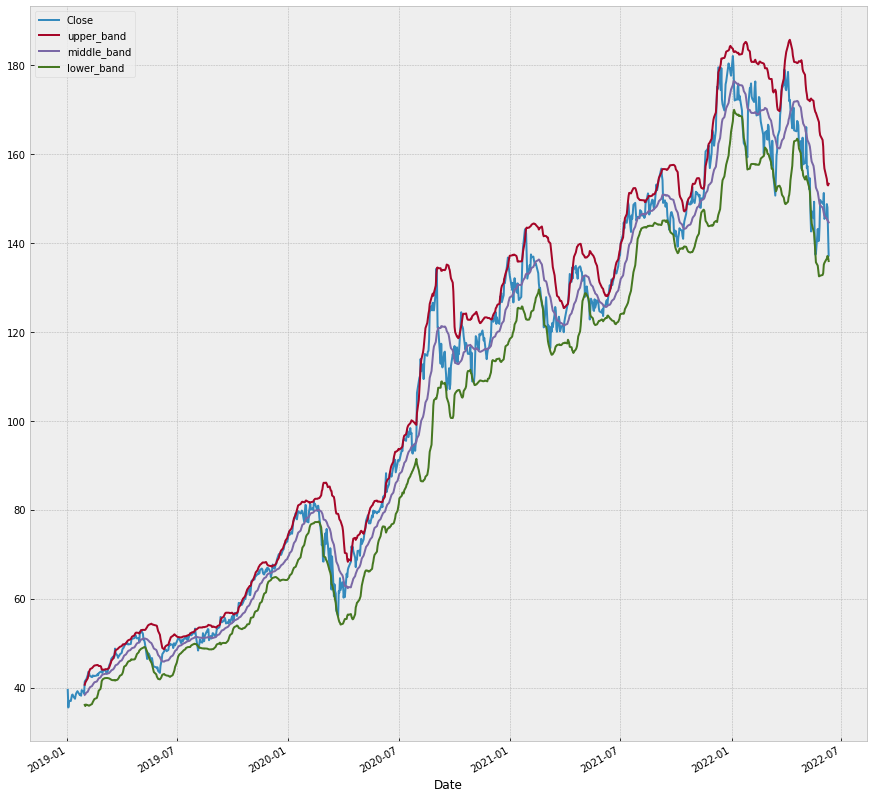

In [ ]:
aapl['upper_band'], aapl['middle_band'], aapl['lower_band'] =  ta.BBANDS(aapl['Close'], timeperiod=20)
aapl[['Close', 'upper_band', 'middle_band', 'lower_band']].plot(figsize=(15, 15))

plt.show()

# RSI
* Relative Strength Index (RSI)
* Índice de fuerza relativa

[RSI](https://www.investopedia.com/terms/r/rsi.asp)

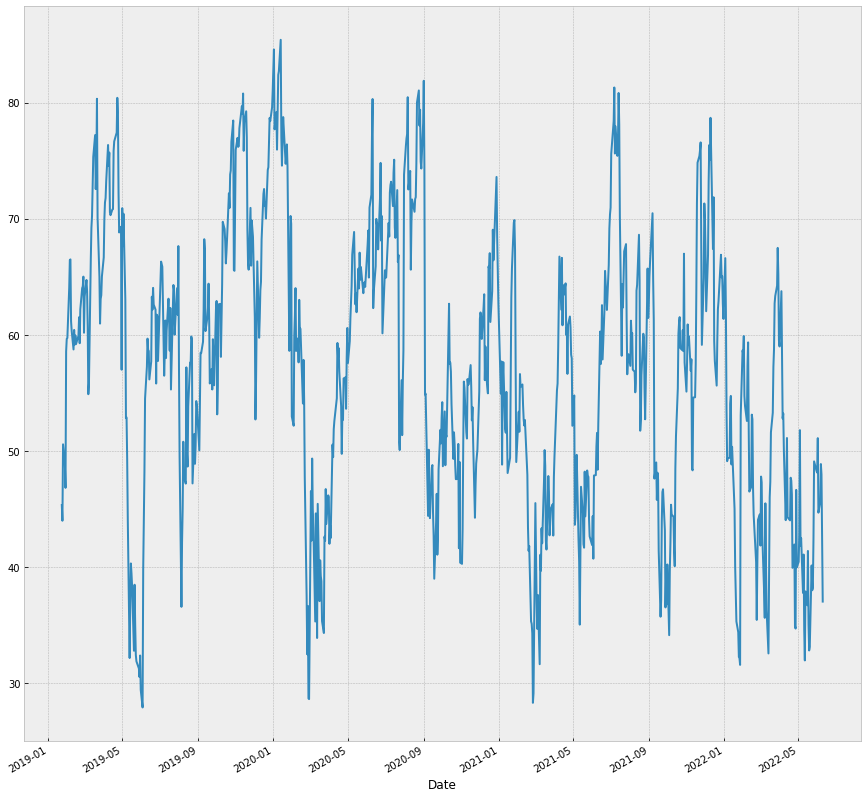

In [ ]:
aapl['RSI'] = ta.RSI(aapl.Close, 14)
aapl['RSI'].plot(figsize=(15, 15))

plt.show()